In [ ]:
!pip install git+https://github.com/SberProcessMining/Sber_Process_Mining.git
!pip install -U matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/SberProcessMining/Sber_Process_Mining.git to /tmp/pip-req-build-e30djkt9
  Running command git clone -q https://github.com/SberProcessMining/Sber_Process_Mining.git /tmp/pip-req-build-e30djkt9
     |████████████████████████████████| 786 kB 5.1 MB/s 
     |████████████████████████████████| 10.3 MB 35.5 MB/s 
     |████████████████████████████████| 583 kB 36.5 MB/s 
     |████████████████████████████████| 55 kB 3.4 MB/s 
     |████████████████████████████████| 381 kB 43.7 MB/s 
     |████████████████████████████████| 8.2 MB 5.1 MB/s 
  Created wheel for sberpm: filename=sberpm-1.3.1-py3-none-any.whl size=133684 sha256=43f3134afc419a57befda374393a4d9a4d8bd7d0932f5980785bedb2ef66ee27
  Stored in directory: /tmp/pip-ephem-wheel-cache-h2fafitk/wheels/1f/6a/19/b183038f4ef480691dc824ce6ff064a8d4a121ae9c0a355187
Successfully built sberpm
  Attempting uninstall: setupto

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 5.3 MB/s 
     |████████████████████████████████| 944 kB 59.8 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sberpm 1.3.1 requires matplotlib~=3.4.2, but you have matplotlib 3.5.2 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Drill planner/Code')

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import sberpm
import pandas as pd
from sberpm.miners import SimpleMiner,CausalMiner, HeuMiner,AlphaPlusMiner, AlphaMiner, InductiveMiner
from sberpm.miners._abstract_miner import AbstractMiner
%matplotlib inline
from sberpm.visual import GraphvizPainter
import matplotlib.pyplot as plt
from sberpm import DataHolder
import networkx as nx
from sberpm.metrics import ActivityMetric, TransitionMetric, IdMetric, TraceMetric, UserMetric,TokenReplay
import numpy as np
from Drill_planner import DrillPlaner, nx_graph, GraphMiner, DrillGraphMiner
from IPython.display import SVG
import missingno as msno
import seaborn as sns

import pandas as pd
import seaborn as sns

In [ ]:
def plan_calculation(plan:list,digraph,type_of_phase,algorithm='dijkstra'):
  plan.append('endevent')
  path = []
  time = []
  stats_time = []

  for i,s in enumerate(plan):
    try:
      if i==0:
        p = nx.shortest_path(digraph,source='startevent',target=s,method=algorithm)
      else:
        p = nx.shortest_path(digraph,source=plan[i-1],target=plan[i],method=algorithm)
    
      if len(p) >= 2:
        for j in range(0,len(p)-1):
          pn = nx.shortest_path(digraph,source=p[j],target=p[j+1],method=algorithm)
          t = nx.path_weight(digraph,pn,weight='weight')
          path.append(pn)
          time.append(t)

      else:
    
        path.append(p)
        t = nx.path_weight(digraph,path[i],weight='weight')
        time.append(t)
    
    except:
      return np.nan
  sum_time = np.array(time).sum()
  for i in range(0,len(path)-1):
    try:
      code = int(path[i][1])
      name_of_operation = data[data['Operation code'] == code]['Type of work'].iloc[0]
    
      #find best time in offset
      median_time = stats.loc[(stats['Operation code'] == code) & (stats['Phase'] == type_of_phase) ]['median'].values
      stats_time.append(median_time[0])


      if code<300:
        ROP_mean = ROP_phase[ROP_phase['Phase'] == type_of_phase]['mean'].values
        print(f'Code of operation {path[i][1]}. Operation time in trace {time[i]} h. Median time in offset  {round(median_time[0],2)} h. {name_of_operation}'
      f' Mean rate of penetration of this section {round(ROP_mean[0],2)} m/h')
      else:
        print(f'Code of operation {path[i][1]}. Operation time in trace {time[i][0]} h. Median time in offset  {round(median_time[0],2)} h.  {name_of_operation}')

    except (ValueError,IndexError):
      continue
  try:
    print(f'Average time for plan in graph {round(sum_time,2)} h')
    print(f'Average time for plan in stats {round(np.array(stats_time).sum(),2)} h')
  except:
    print(f'Average time for plan in graph {(sum_time)} h')
    print(f'Average time for plan in stats {(np.array(stats_time).sum())} h')


  return path, time,sum_time,stats_time


# Data loading

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Drill planner/Data/Dataset2.xlsx')

In [ ]:
GGD = pd.read_excel('/content/drive/MyDrive/Drill planner/Data/Master_file_saudi_aramco2.xlsx',sheet_name='План')

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [ ]:
# import stats
ROP_phase = pd.read_csv('/content/drive/MyDrive/Drill planner/Data/ROP_per_phase.csv')
stats = pd.read_csv('/content/drive/MyDrive/Drill planner/Data/stat_per_phase.csv')

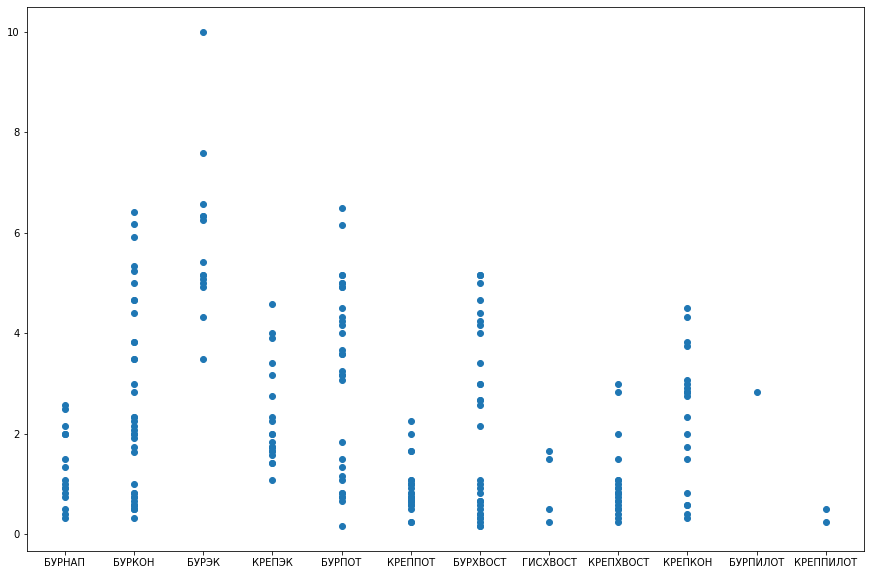

In [ ]:
code_305 = data.loc[data['Operation code'] == 305]
plt.figure(figsize=(15,10))
plt.scatter(code_305['Phase'],code_305['Time, h (in grains)'])

In [ ]:
data['Median_time'] = 0
for phase in data['Phase'].unique():
  for code in data['Operation code'].unique():
    try:

      median_time = stats.loc[(stats['Phase']== phase) & (stats['Operation code']== code),'median'].values[0]
     # print(median_time)
      data.loc[ (data['Phase'] == phase) & (data['Operation code'] == code),'Median_time' ] = median_time
    except:
      continue

## For exploratory drilling phase

In [ ]:
data['Operation code'] = data['Operation code'].astype(int)
burcon = data[data['Phase'] == 'БУРКОН']
burek = data[data['Phase'] == 'БУРЭК']
burhvost = data[data['Phase'] == 'БУРХВОСТ']
burpot = data[data['Phase'] == 'БУРПОТ']


def prepare_miners(data,type_of_phase,duration_column = 'Time, h',duration_unit='hour',time_in_miners='Median_time'):
  data_phase = data[data['Phase'] == type_of_phase]
 
  data_holder = DataHolder(data=data_phase, 
                            id_column='Well number', 
                            activity_column='Operation code', 
                        #   start_timestamp_column='Timestamp',
                         #    time_format='%Y.%m.%d',)
                            duration_column = duration_column,
                           duration_unit=duration_unit)

  causal_miner = DrillPlaner(CausalMiner,data_holder,data_phase,[time_in_miners],stats)
  causal_dfg = causal_miner.digraph()

 # DFG_miner = DrillGraphMiner(data_phase, time_in_miners, 'Operation code')
 # dfg =DFG_miner.to_dfg()

  simple_miner = DrillPlaner(SimpleMiner,data_holder,data_phase,[time_in_miners],stats)
  simple_dfg = simple_miner.digraph()
  return simple_dfg, causal_dfg #, dfg

In [ ]:
production_miners = prepare_miners(data,'БУРЭК')
plan_calculation(['305','201','401','425','310','endevent'],production_miners[1],type_of_phase='БУРЭК') #38.5 #21.38

Code of operation 305. Operation time in trace 5.29 h. Median time in offset  5.29 h.  Сборка роторной КНБК
Code of operation 342. Operation time in trace 1.25 h. Median time in offset  0.25 h.  Наращивание при СПО
Code of operation 201. Operation time in trace [5.29] h. Median time in offset  5.29 h. Бурение ВЗД с вращением БК Mean rate of penetration of this section 10.1 m/h
Code of operation 420. Operation time in trace 1.33 h. Median time in offset  1.5 h.  Промывка перед наращиванием с вращением
Code of operation 401. Operation time in trace 2.25 h. Median time in offset  1.33 h.  Промывка с расхаживанием и вращением БИ (не более 1 свечи)
Code of operation 415. Operation time in trace 0.33 h. Median time in offset  1.0 h.  Снятие замеров с ТС после наращивания
Code of operation 425. Operation time in trace 5.58 h. Median time in offset  0.71 h.  Прямая проработка
Code of operation 212. Operation time in trace [1.5] h. Median time in offset  1.38 h. Разбуривание тех. оснастки с ВЗД

/usr/local/lib/python3.7/dist-packages/sberpm/_holder.py:316: UserWarning: DataHolder: time column is not given, cannot sort the activities.
  warnings.warn('DataHolder: time column is not given, cannot sort the activities.', UserWarning)


([['startevent', '305'],
  ['305', '342'],
  ['342', '201'],
  ['201', '420'],
  ['420', '401'],
  ['401', '415'],
  ['415', '425'],
  ['425', '212'],
  ['212', '310'],
  ['310', '323'],
  ['323', 'endevent'],
  ['endevent']],
 [array([5.29]),
  array([1.25]),
  array([5.29]),
  array([1.33]),
  array([2.25]),
  array([0.33]),
  array([5.58]),
  array([1.5]),
  array([1.]),
  array([1.5]),
  array([1.33]),
  array([5.58])],
 32.23,
 [5.291666666666667,
  0.2499999999999991,
  5.291666666666667,
  1.5,
  1.333333333333334,
  1.000000000000002,
  0.7083333333333331,
  1.3750000000000004,
  4.25,
  0.9999999999999992])

In [ ]:
# duration_column = 'Time, h',duration_unit='hour',time_in_miners='Time, h (in grains)'
plan_calculation(['305','201','401','425','310','endevent'],production_miners[0],type_of_phase='БУРЭК') #38.5 #21.38

Code of operation 305. Operation time in trace 5.29 h. Median time in offset  5.29 h.  Сборка роторной КНБК
Code of operation 343. Operation time in trace 1.33 h. Median time in offset  0.33 h.  Наращивание во время бурения свечой
Code of operation 201. Operation time in trace [0.33] h. Median time in offset  5.29 h. Бурение ВЗД с вращением БК Mean rate of penetration of this section 10.1 m/h
Code of operation 401. Operation time in trace 1.0 h. Median time in offset  1.33 h.  Промывка с расхаживанием и вращением БИ (не более 1 свечи)
Code of operation 425. Operation time in trace 0.63 h. Median time in offset  0.71 h.  Прямая проработка
Code of operation 343. Operation time in trace 0.71 h. Median time in offset  0.33 h.  Наращивание во время бурения свечой
Code of operation 310. Operation time in trace 1.0 h. Median time in offset  4.25 h.  Разборка роторной КНБК
Code of operation 323. Operation time in trace 5.29 h. Median time in offset  1.0 h.  Шаблонировка вверх
Average time for 

([['startevent', '305'],
  ['305', '343'],
  ['343', '201'],
  ['201', '401'],
  ['401', '425'],
  ['425', '343'],
  ['343', '310'],
  ['310', '323'],
  ['323', 'endevent'],
  ['endevent']],
 [array([5.29]),
  array([1.33]),
  array([0.33]),
  array([1.]),
  array([0.63]),
  array([0.71]),
  array([1.]),
  array([5.29]),
  array([1.33]),
  array([1.])],
 17.91,
 [5.291666666666667,
  0.3333333333333321,
  5.291666666666667,
  1.333333333333334,
  0.7083333333333331,
  0.3333333333333321,
  4.25,
  0.9999999999999992])

In [ ]:
#data_holder.data['Median_time'] =  data_holder.data['Median_time'] / 60**2/24

production_miners = prepare_miners(data,'БУРЭК')

print(f'Causal quantity of nodes = {len(production_miners[1].nodes)} .\n'
f'Simple quantity of nodes = {(len(production_miners[0].nodes))} \n'
#f'DFG quantity of nodes = {(len(production_miners[2].nodes))} \n'
f'Causal edges = {len(production_miners[1].edges)} \n'
f'Simple edges = {len(production_miners[0].edges)} \n'
#f'DFG edges = {len(production_miners[2].edges)}'
)

time_stats_st = data.groupby(['Well number','Phase'])['Time, h (in grains)'].agg('sum')
time_stats_mt = data.groupby(['Well number','Phase'])['Median_time'].agg('sum')
time_stats__st_frame = time_stats_st.unstack(level=1)
time_stats__mt_frame = time_stats_mt.unstack(level=1)

time_stats__mt_frame['Type of plan'] = 'Median time'
time_stats__st_frame['Type of plan'] = 'Drill report time'

time_stats = pd.concat([time_stats__mt_frame,time_stats__st_frame])

time_stats.index = np.array(time_stats.index,dtype=int)

time_stats__mt_frame.to_excel('median_time.xlsx')
mt_ts = pd.read_excel('median_time.xlsx')

Causal quantity of nodes = 38 .
Simple quantity of nodes = 38 
Causal edges = 126 
Simple edges = 276 



/usr/local/lib/python3.7/dist-packages/sberpm/_holder.py:316: UserWarning: DataHolder: time column is not given, cannot sort the activities.
  warnings.warn('DataHolder: time column is not given, cannot sort the activities.', UserWarning)


In [ ]:
GGD.groupby(['Номер скважины','Фаза'])['Длительность операции, ч'].agg('sum').unstack(level=1).to_excel('ggd.xlsx')
GGD2 = pd.read_excel('ggd.xlsx')

GGD2['Type of plan'] = 'Planned time'
GGD2.index = np.array(GGD2['Номер скважины'])
GGD2 = GGD2.drop(columns=['ЗАКАН','ГИСТК','БУРТК','КРЕПТК','Номер скважины'])
GGD2 

,БУРКОН,БУРНАП,БУРПИЛОТ,БУРПОТ,БУРХВОСТ,БУРЭК,ГИСКОН,ГИСПИЛОТ,ГИСПОТ,ГИСХВОСТ,ГИСЭК,КРЕПКОН,КРЕПНАП,КРЕППИЛОТ,КРЕППОТ,КРЕПХВОСТ,КРЕПЭК,Type of plan
1057,256.862535,47.215000,184.677494,283.521785,325.593197,121.157868,35.94000,196.8,130.0000,85.60000,60.23000,193.886863,49.848333,199.83326,158.795386,143.609622,203.255715,Planned time
2057,130.990306,22.481667,NaN,366.016796,254.934253,134.767744,35.94000,NaN,79.0000,35.20000,50.23000,194.777007,49.848333,NaN,184.379007,121.059410,215.404502,Planned time
2076,264.000000,23.040000,NaN,468.720000,289.920000,196.560000,38.40000,NaN,78.9600,56.40000,50.16000,203.280000,49.920000,NaN,208.320000,186.000000,211.200000,Planned time
2083,169.346062,19.802222,NaN,333.825986,251.066658,228.091185,35.94000,NaN,79.0000,35.20000,50.23000,181.736958,48.816667,NaN,189.371254,131.454074,222.319698,Planned time
2084,155.913229,23.160000,NaN,425.942911,246.963435,177.973208,35.94000,NaN,79.0000,85.60000,50.23000,219.438816,49.848333,NaN,197.471437,168.691003,248.834746,Planned time
3024,217.055043,21.913333,NaN,296.312442,380.102916,147.610431,35.94000,NaN,79.0000,35.20000,50.23000,201.450334,49.848333,NaN,169.000364,142.673722,202.249781,Planned time
3044,263.055530,26.476188,NaN,386.653260,317.133962,185.280242,43.72335,NaN,95.4840,39.42000,71.55825,196.182220,53.209700,NaN,229.036229,159.106824,266.468871,Planned time
3063,196.990792,27.428333,NaN,NaN,NaN,NaN,19.05000,NaN,NaN,NaN,NaN,132.574211,47.850000,NaN,NaN,NaN,NaN,Planned time
3071,236.522751,23.160000,NaN,287.510928,185.254160,98.171396,21.09800,NaN,4.7796,106.81875,23.77000,181.902925,53.348333,NaN,278.539307,133.034153,387.143809,Planned time
3094,219.505910,21.913333,NaN,417.499046,193.988139,135.545468,35.94000,NaN,79.0000,58.74000,50.23000,203.663057,51.498333,NaN,178.576872,179.712224,207.200493,Planned time


In [ ]:
conductor_miners = prepare_miners(data,'БУРКОН')
liner_miners = prepare_miners(data,'БУРХВОСТ')
pot_miners = prepare_miners(data,'БУРПОТ')
cement_liner_miners = prepare_miners(data,'КРЕПХВОСТ')
cement_conductor_miners = prepare_miners(data,'КРЕПКОН')

/usr/local/lib/python3.7/dist-packages/sberpm/_holder.py:277: UserWarning: DataHolder: column Well number has 1 None values, the corresponding rows will be removed.
  f'the corresponding rows will be removed.', UserWarning)
/usr/local/lib/python3.7/dist-packages/sberpm/_holder.py:316: UserWarning: DataHolder: time column is not given, cannot sort the activities.
  warnings.warn('DataHolder: time column is not given, cannot sort the activities.', UserWarning)
/usr/local/lib/python3.7/dist-packages/sberpm/_holder.py:316: UserWarning: DataHolder: time column is not given, cannot sort the activities.
  warnings.warn('DataHolder: time column is not given, cannot sort the activities.', UserWarning)
/usr/local/lib/python3.7/dist-packages/sberpm/_holder.py:316: UserWarning: DataHolder: time column is not given, cannot sort the activities.
  warnings.warn('DataHolder: time column is not given, cannot sort the activities.', UserWarning)
/usr/local/lib/python3.7/dist-packages/sberpm/_holder.py:31

In [ ]:
a = np.array([1,2,3,4,51.57*3,75.48*2,6,7,8,9,10,11,12,13,14,15,16,0]).reshape(1,-1)
#av_time = pd.DataFrame(a, columns=time_stats.columns, index=['Graph plan'])
#av_time 

wells = [ int(well) for well in data['Well number'].unique() if not np.isnan(well) ]
wells = np.array(time_stats__mt_frame.index, dtype=int)

time_stats2 = time_stats #.append(av_time)
#time_stats2.iloc[-1,-1] = 'Best graph time'
time_stats2 = time_stats2.append(GGD2)

In [ ]:
plan = data.loc[(data['Well number'] == 3024) & (data['Phase'] == 'БУРЭК') ]['Operation code'].values.tolist()
plan = list(map(str,plan))
b = plan_calculation(plan,production_miners[0],type_of_phase='БУРЭК')

Code of operation 305. Operation time in trace 5.29 h. Median time in offset  5.29 h.  Сборка роторной КНБК
Code of operation 342. Operation time in trace 5.29 h. Median time in offset  0.25 h.  Наращивание при СПО
Code of operation 201. Operation time in trace [1.] h. Median time in offset  5.29 h. Бурение ВЗД с вращением БК Mean rate of penetration of this section 10.1 m/h
Code of operation 347. Operation time in trace 0.71 h. Median time in offset  1.33 h.  Спуск КНБК в открытом стволе
Code of operation 429. Operation time in trace 1.0 h. Median time in offset  0.33 h.  Опрессовка ВЗД
Code of operation 305. Operation time in trace 1.0 h. Median time in offset  5.29 h.  Сборка роторной КНБК
Code of operation 347. Operation time in trace 0.71 h. Median time in offset  1.33 h.  Спуск КНБК в открытом стволе
Code of operation 401. Operation time in trace 2.25 h. Median time in offset  1.33 h.  Промывка с расхаживанием и вращением БИ (не более 1 свечи)
Code of operation 212. Operation tim

In [ ]:
plan = data.loc[(data['Well number'] == 2084) & (data['Phase'] == 'БУРЭК') ]['Operation code'].values.tolist()
plan = list(map(str,plan))
b4 = plan_calculation(plan,production_miners[0],type_of_phase='БУРЭК')

Code of operation 305. Operation time in trace 5.29 h. Median time in offset  5.29 h.  Сборка роторной КНБК
Code of operation 347. Operation time in trace 0.71 h. Median time in offset  1.33 h.  Спуск КНБК в открытом стволе
Code of operation 425. Operation time in trace 5.29 h. Median time in offset  0.71 h.  Прямая проработка
Code of operation 347. Operation time in trace 0.33 h. Median time in offset  1.33 h.  Спуск КНБК в открытом стволе
Code of operation 425. Operation time in trace 5.29 h. Median time in offset  0.71 h.  Прямая проработка
Code of operation 347. Operation time in trace 0.33 h. Median time in offset  1.33 h.  Спуск КНБК в открытом стволе
Code of operation 406. Operation time in trace 5.29 h. Median time in offset  0.63 h.  Выход на режим
Code of operation 201. Operation time in trace [0.33] h. Median time in offset  5.29 h. Бурение ВЗД с вращением БК Mean rate of penetration of this section 10.1 m/h
Code of operation 343. Operation time in trace 1.0 h. Median time i

In [ ]:
b4

([['startevent', '305'],
  ['305', '347'],
  ['347', '425'],
  ['425', '347'],
  ['347', '425'],
  ['425', '347'],
  ['347', '406'],
  ['406', '201'],
  ['201', '343'],
  ['343', '419'],
  ['419', '416'],
  ['416', '201'],
  ['201', '343'],
  ['343', '419'],
  ['419', '416'],
  ['416', '406'],
  ['406', '418'],
  ['418', '201'],
  ['201', '343'],
  ['343', '419'],
  ['419', '416'],
  ['416', '406'],
  ['406', '418'],
  ['418', '346'],
  ['346', '407'],
  ['407', '201'],
  ['201', '343'],
  ['343', '419'],
  ['419', '416'],
  ['416', '406'],
  ['406', '418'],
  ['418', '346'],
  ['346', '201'],
  ['201', '343'],
  ['343', '419'],
  ['419', '416'],
  ['416', '406'],
  ['406', '418'],
  ['418', '346'],
  ['346', '201'],
  ['201', '343'],
  ['343', '419'],
  ['419', '416'],
  ['416', '406'],
  ['406', '418'],
  ['418', '201'],
  ['201', '419'],
  ['419', '406'],
  ['406', '201'],
  ['201', '419'],
  ['419', '201'],
  ['201', '419'],
  ['419', '406'],
  ['406', '343'],
  ['343', '201'],
  [

In [ ]:
burek_time = []
burhvost_time = []
krep_hvost_time = []
burkon_time = []
for well in wells:
  print(well)
  plan = data.loc[(data['Well number'] == well) & (data['Phase'] == 'БУРЭК') ]['Operation code'].values.tolist()
  plan = list(map(str,plan))
  b = plan_calculation(plan,production_miners[0],type_of_phase='БУРЭК')

  plan = data.loc[(data['Well number'] == well) & (data['Phase'] == 'БУРХВОСТ') ]['Operation code'].values.tolist()
  plan = list(map(str,plan))
  b2 = plan_calculation(plan,liner_miners[0],type_of_phase='БУРХВОСТ')


  plan = data.loc[(data['Well number'] == well) & (data['Phase'] == 'КРЕПХВОСТ') ]['Operation code'].values.tolist()
  plan = list(map(str,plan))
  b3 = plan_calculation(plan,cement_liner_miners[0],type_of_phase='КРЕПХВОСТ')

  plan = data.loc[(data['Well number'] == well) & (data['Phase'] == 'БУРКОН') ]['Operation code'].values.tolist()
  plan = list(map(str,plan))
  b4 = plan_calculation(plan,conductor_miners[0],type_of_phase='БУРКОН')
  t = []


  try:
     for bb in [b,b2,b3,b4]:
       if np.array(bb[2]).sum() < np.array(bb[3]).sum():
         t.append(np.array(bb[2]).sum())
       else:
         t.append(np.array(bb[3]).sum())

  except TypeError:
     t = [0,0,0,0]

  
  burek_time.append(t[0])
  burhvost_time.append(t[1])
  krep_hvost_time.append(t[2])
  burkon_time.append(t[3])
  
time = np.array(burek_time)
time2 = np.array(burhvost_time)
time3 = np.array(krep_hvost_time)
time4 = np.array(burkon_time)

1051
Code of operation 305. Operation time in trace 5.29 h. Median time in offset  5.29 h.  Сборка роторной КНБК
Code of operation 347. Operation time in trace 0.71 h. Median time in offset  1.33 h.  Спуск КНБК в открытом стволе
Code of operation 425. Operation time in trace 5.29 h. Median time in offset  0.71 h.  Прямая проработка
Code of operation 201. Operation time in trace [0.33] h. Median time in offset  5.29 h. Бурение ВЗД с вращением БК Mean rate of penetration of this section 10.1 m/h
Code of operation 419. Operation time in trace 0.33 h. Median time in offset  2.25 h.  Проработка перед наращиванием
Code of operation 323. Operation time in trace 1.5 h. Median time in offset  1.0 h.  Шаблонировка вверх
Code of operation 343. Operation time in trace 1.33 h. Median time in offset  0.33 h.  Наращивание во время бурения свечой
Code of operation 406. Operation time in trace 1.0 h. Median time in offset  0.63 h.  Выход на режим
Code of operation 201. Operation time in trace [0.33] h.

In [ ]:
time4

array([185.1       , 110.54166667, 273.83333333, 115.37      ,
       181.70833333, 174.91666667, 130.66      , 153.5       ,
       137.93      ,  51.23      ,  72.59      ])

# Visualization

In [ ]:
time_stats3 = time_stats2
for well,t,hv_t,c_hv_t,burkon_t in zip(wells,time,time2,time3,time4):
    a = np.array([burkon_t,2,3,4,hv_t,t,6,7,8,9,10,11,12,13,14,c_hv_t,16,0]).reshape(1,-1)
    av_time = pd.DataFrame(a, columns=time_stats.columns, index=[well])
    time_stats3 = time_stats3.append(av_time)
    time_stats3.iloc[-1,-1] = 'Graph plan'


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator


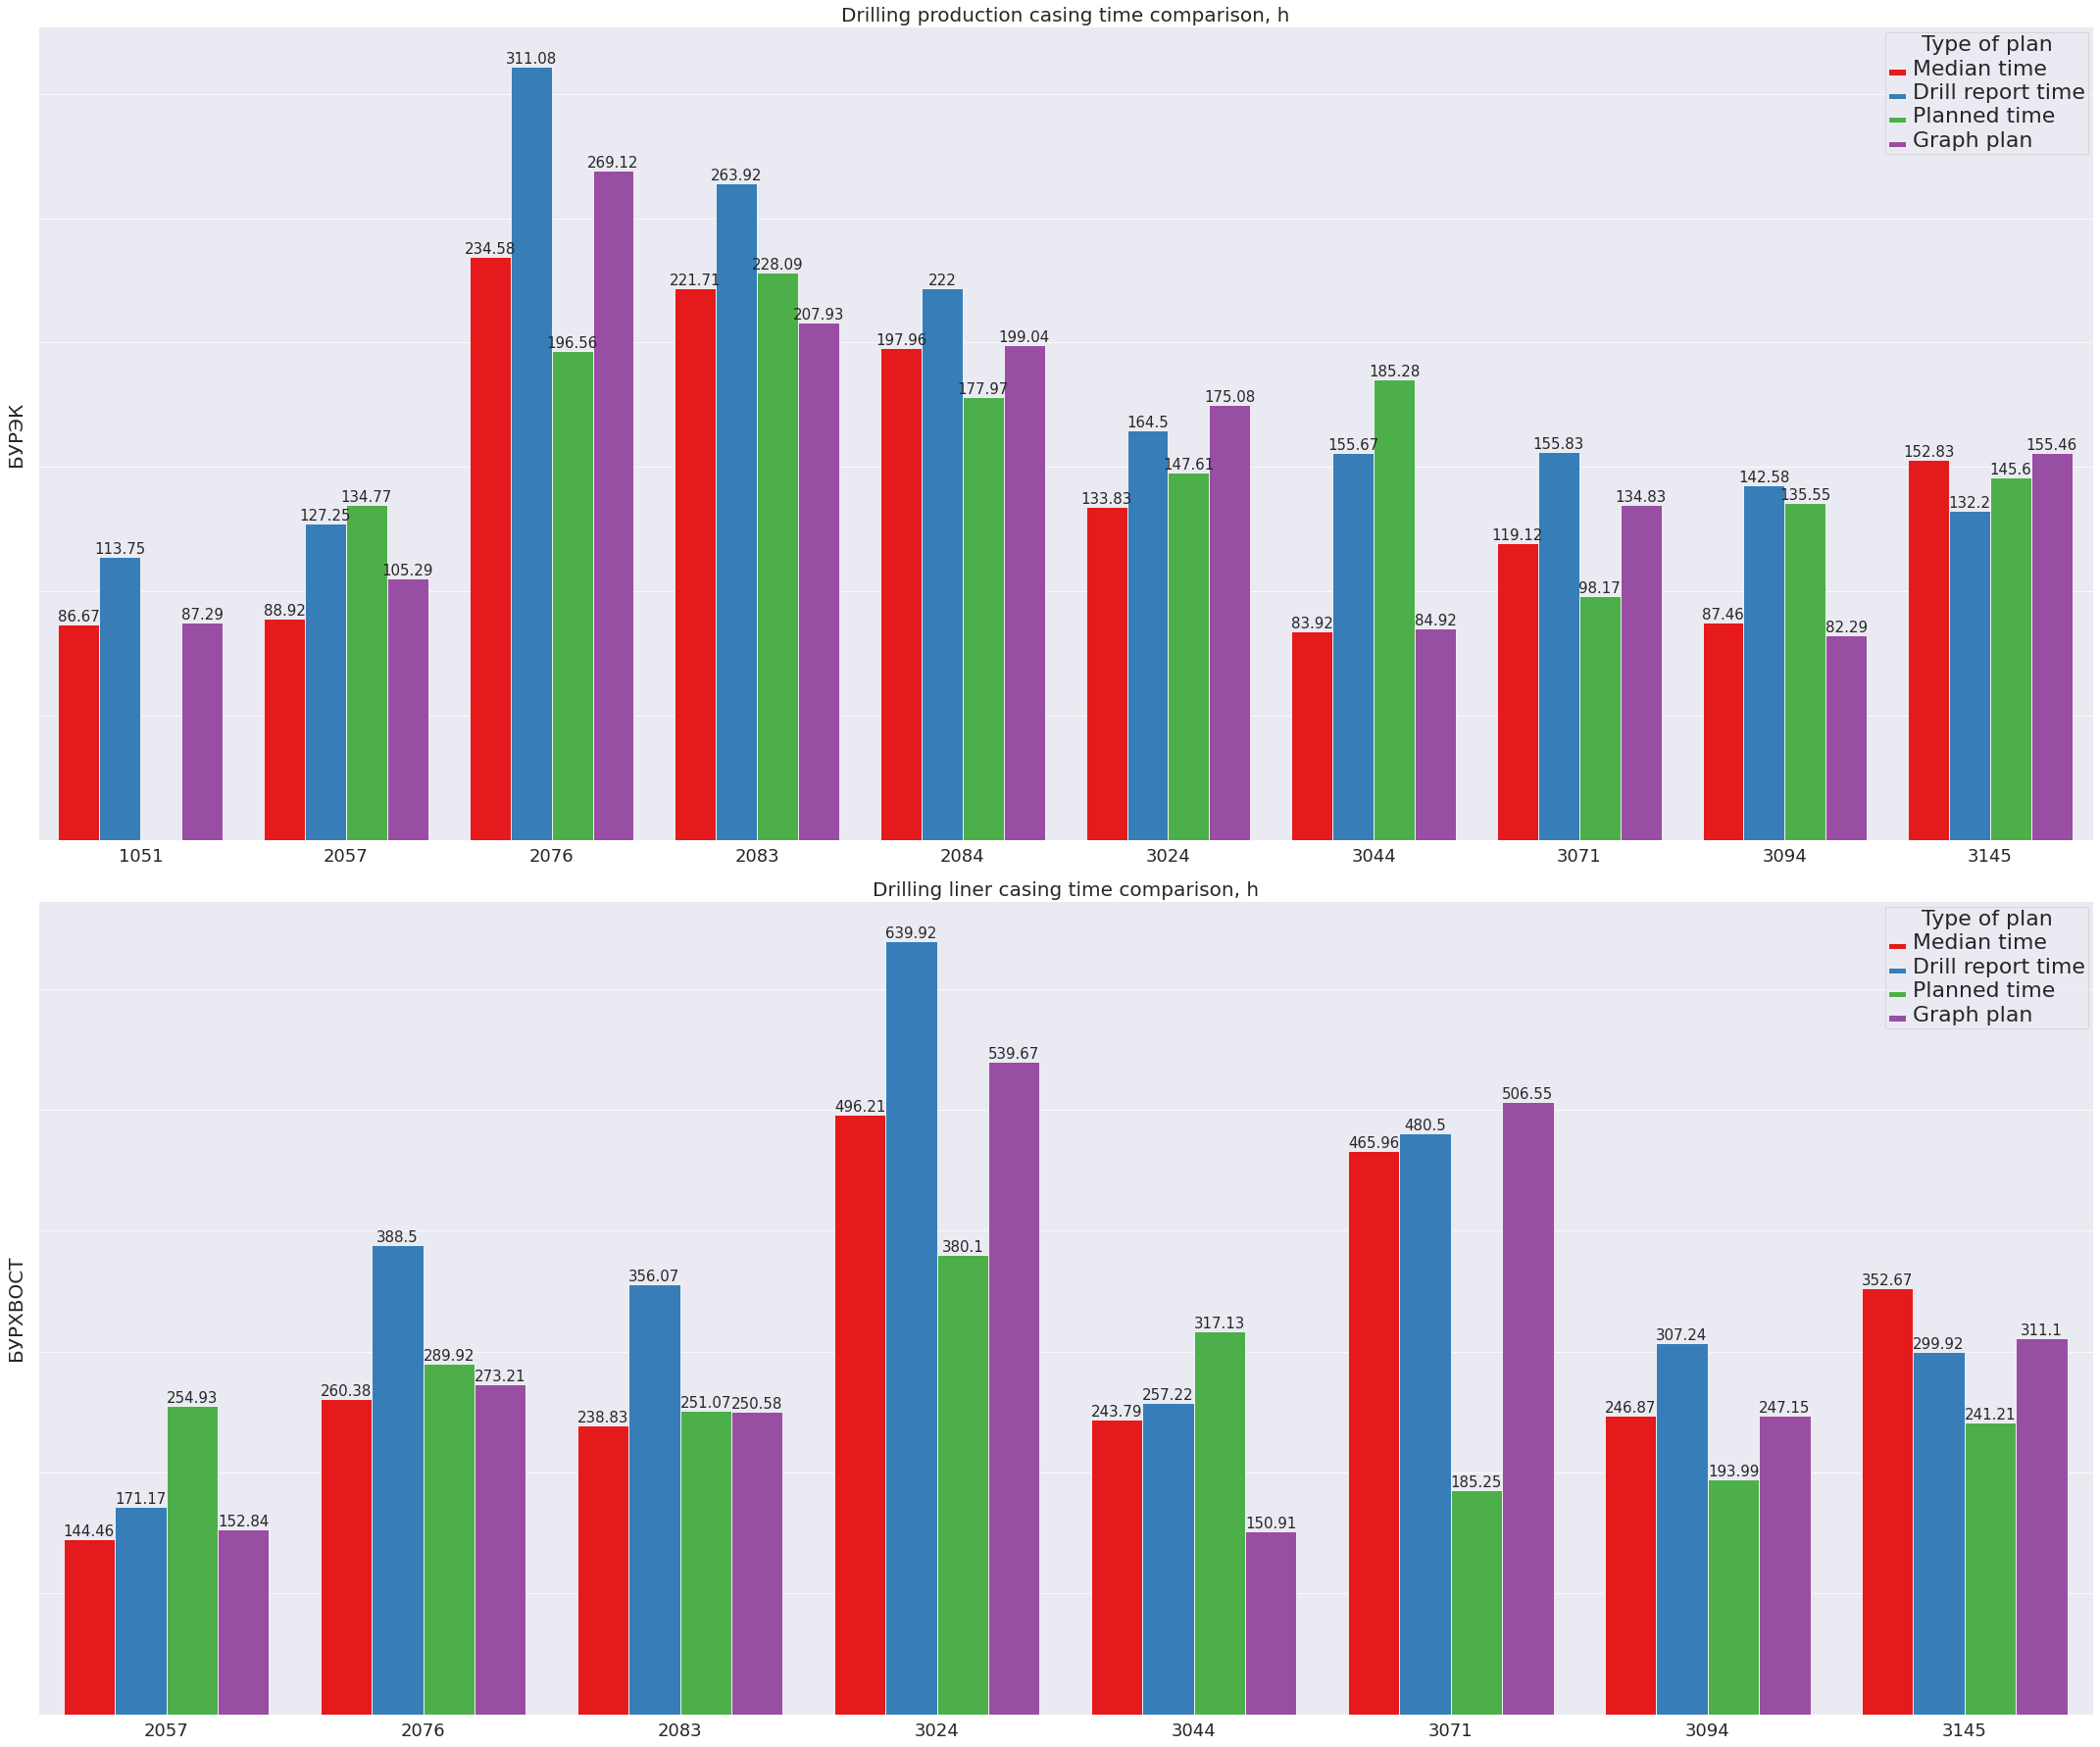

In [ ]:
time_stats3 = time_stats3.round(2)

time_stats4 = time_stats3.drop(index=[3063,3131,1057])

time_stats5 = time_stats3.drop(index=[2084,1051,3063,3131,1057])

time_stats6 = time_stats3.drop(index=[3131,1057])

fig, ax = plt.subplots(2,1,figsize=(30,25)) #gridspec_kw={'width_ratios': [3, 1]},
sns.set(font_scale = 1)
sns.set_style('darkgrid')
sns.set_palette('Set1')


sns.set_context("paper", rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":20})   


axs = sns.barplot(x=time_stats4.index,y='БУРЭК',data=time_stats4,hue='Type of plan' ,ax=ax[0],saturation=1,dodge=True)   #orient='v') hue='Median_time'
for container in axs.containers:
    axs.bar_label(container)
axs.tick_params(labelsize=5)
axs.set_xticklabels(axs.get_xmajorticklabels(), fontsize = 18)
axs.set_yticklabels(axs.get_ymajorticklabels(), fontsize = 30)
axs.set_title('Drilling production casing time comparison, h',fontsize=20)
plt.setp(axs.get_legend().get_texts(), fontsize='22')
plt.setp(axs.get_legend().get_title(), fontsize='22')

sns.despine(right=True)


axs = sns.barplot(x=time_stats5.index,y='БУРХВОСТ',data=time_stats5,hue='Type of plan' ,ax=ax[1],saturation=1)   #orient='v') hue='Median_time'
for container in axs.containers:
     axs.bar_label(container)
axs.set_xticklabels(axs.get_xmajorticklabels(), fontsize = 18)
axs.set_yticklabels(axs.get_ymajorticklabels(), fontsize = 30)
axs.set_title('Drilling liner casing time comparison, h',fontsize=20)
plt.setp(axs.get_legend().get_texts(), fontsize='22')
plt.setp(axs.get_legend().get_title(), fontsize='22') 
sns.despine(right=True)



# axs = sns.barplot(x=time_stats5.index,y='КРЕПХВОСТ',data=time_stats5,hue='Type of plan' ,ax=ax[2],saturation=1)   #orient='v') hue='Median_time'
# for container in axs.containers:
#      axs.bar_label(container)
# axs.set_xticklabels(axs.get_xmajorticklabels(), fontsize = 18)
# axs.set_yticklabels(axs.get_ymajorticklabels(), fontsize = 30)
# axs.set_title('Cementing liner casing time comparison, h',fontsize=20)
# plt.setp(axs.get_legend().get_texts(), fontsize='22')
# plt.setp(axs.get_legend().get_title(), fontsize='22') 
# sns.despine(right=True)



# axs = sns.barplot(x=time_stats6.index,y='БУРКОН',data=time_stats6,hue='Type of plan' ,ax=ax[3],saturation=1)   #orient='v') hue='Median_time'
# for container in axs.containers:
#      axs.bar_label(container)
# axs.set_xticklabels(axs.get_xmajorticklabels(), fontsize = 18)
# axs.set_yticklabels(axs.get_ymajorticklabels(), fontsize = 30)
# axs.set_title('Drilling surface casing time comparison, h',fontsize=20)
# plt.setp(axs.get_legend().get_texts(), fontsize='22')
# plt.setp(axs.get_legend().get_title(), fontsize='22') 
# sns.despine(right=True)



fig.tight_layout()
plt.savefig('result_of_algorithm.jpg')